# Desafio Nestle - Challenger
---
<p style = "font-family: consolas; color: Blue"> 
Vamos realizar inicialmente um ETL para analisar as tabelas e os dados!
</p>


In [3]:
#importando nossas bibliotecas para analisar os dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Agora vamos carregar nossos dados
tb_address = pd.read_csv('Dados Nestle/tb_addresses.csv', sep=';')
tb_address.head()

,id_endereco,id_fornecedor,bairro,ponto_referencia,cidade,estado,uf,pais,tipo,cep
0,6158e903c044d80022ae40b9,NaN,Conjunto Adalberto Sena,NaN,Rio Branco,Acre,AC,Brasil,HISTORY,69900001.0
1,615b312b53c10b002275d928,NaN,Nova Estacao,NaN,Rio Branco,Acre,AC,Brasil,HISTORY,69900001.0
2,60c2de7e52f4f30021f53891,NaN,Terminal Cadeia Velha,NaN,Rio Branco,Acre,AC,Brasil,HISTORY,69900001.0
3,60e4f879a3d5dd0021ac84bf,NaN,Vitoria,Greengard,Rio Branco,Acre,AC,Brasil,HISTORY,69900001.0
4,60f5f30476d90d00217f60a3,NaN,Primavera,NaN,Arapiraca,Alagoas,AL,Brasil,HISTORY,57300001.0


In [5]:
#Analisando nossos dados
tb_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87217 entries, 0 to 87216
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_endereco       87217 non-null  object 
 1   id_fornecedor     409 non-null    object 
 2   bairro            83455 non-null  object 
 3   ponto_referencia  20336 non-null  object 
 4   cidade            87217 non-null  object 
 5   estado            87217 non-null  object 
 6   uf                87217 non-null  object 
 7   pais              87217 non-null  object 
 8   tipo              87217 non-null  object 
 9   cep               84178 non-null  float64
dtypes: float64(1), object(9)
memory usage: 6.7+ MB


In [6]:
#Puxando tabela de produtos
tb_products = pd.read_csv('Dados Nestle/tb_products.csv', sep=';')
tb_products.head()

,id_produto,id_fornecedor,id_disconto,id_tipo,nome,ativo,aprovado,arquivado,entregavel,recuperavel,tempo_preparacao_minutos,avaliacao_media
0,5f550676cba01d00210ed018,5f550609cba01d00210ed015,NaN,5f518a26a4a5fbed86099757,Bolo de cenoura teste,True,False,False,True,False,1980.0,0.0
1,5f5ea709a4944c00215bc67f,5f550609cba01d00210ed015,5fb3af31d09539002159d15a,5f518a26a4a5fbed86099757,Bolo de cenoura e chocolate,True,False,False,True,True,0.0,0.0
2,5f60221d70be91002137eb61,5f601c9d70be91002137eb5c,NaN,5f518a26a4a5fbed86099757,Bolo de leite ninho com morangos,False,False,True,True,True,1569.0,0.0
3,5f60245670be91002137eb77,5f601c9d70be91002137eb5c,NaN,5f518a26a4a5fbed86099757,Bolo de limão,False,False,True,True,True,1501.0,0.0
4,5f6025d170be91002137eb83,5f601c9d70be91002137eb5c,NaN,5f518a26a4a5fbed86099757,Bolo de cenoura,False,False,True,True,True,1467.0,0.0


In [7]:
#Analisando tabela de vendedores
tb_vendors = pd.read_csv('Dados Nestle/tb_vendors.csv', sep=';')
tb_vendors.head()

,id_fornecedor,nome_fornecedor,data_registro,qtde_produtos,preco_medio,avaliacao_media,e_aprovado,nome_empresa,id_endereco,delivery_raio_km,delivery_sistema,hora_abertura,hora_fechamento,data_aprovacao,data_reprovacao
0,5f550609cba01d00210ed015,Meus Bolos,2020-09-06 00:42:34,0,0,0,False,Mwyhs Umprdss Ltds.,5f550609cba01d00210ed016,20,THIRD_PARTY,05:30,19:00,2021-06-01 16:22:09,2021-08-10 15:40:47
1,5f584189fc58110021464422,Moça Doceria,2020-09-09 01:56:25,0,0,0,False,BUSTLU BRRSIL LTDR.,5f584189fc58110021464423,13,NaN,08:00,18:00,2021-02-16 18:25:45,2021-09-09 13:45:56
2,5f5a8be1ccc6c40021a8185f,Cami's Candy,2020-09-10 00:49:18,0,0,0,True,Csmws Csydy,5f5a8be1ccc6c40021a81860,15,NaN,08:00,19:00,2021-08-16 21:06:05,2021-06-25 17:22:33
3,5f5bc310b8742200213bda1d,Re doces,2020-09-11 01:07:10,0,0,0,True,Rdysts Cury Mwchslsyy,5f5bc310b8742200213bda1e,15,NaN,10:00,17:00,2020-09-30 17:13:38,NaN
4,5f5bd2fcb8742200213bda24,Doceria Luz,2020-09-11 01:07:10,0,0,0,False,Psmdlls Crwstwys Luz 08949458667,5f5bd2fcb8742200213bda25,13,THIRD_PARTY,11:00,17:00,2021-04-26 20:55:50,2021-04-26 20:55:51


In [8]:
#Analisando valores da tabela
tb_vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_fornecedor     403 non-null    object
 1   nome_fornecedor   403 non-null    object
 2   data_registro     403 non-null    object
 3   qtde_produtos     403 non-null    int64 
 4   preco_medio       403 non-null    int64 
 5   avaliacao_media   403 non-null    int64 
 6   e_aprovado        403 non-null    bool  
 7   nome_empresa      403 non-null    object
 8   id_endereco       403 non-null    object
 9   delivery_raio_km  403 non-null    int64 
 10  delivery_sistema  36 non-null     object
 11  hora_abertura     403 non-null    object
 12  hora_fechamento   403 non-null    object
 13  data_aprovacao    194 non-null    object
 14  data_reprovacao   139 non-null    object
dtypes: bool(1), int64(4), object(10)
memory usage: 44.6+ KB


In [9]:
#Quantos fornecedores existem
len(tb_vendors['id_fornecedor'].unique())

403

In [10]:
len(tb_vendors[tb_vendors['e_aprovado'] == True]['id_fornecedor'].unique()) #analisando a quantidade de vendedores (fornecedores aprovados para vendas)

131

In [11]:
#Ou seja, temos uma zona morta de 
print(f'Zona morta de fornecedores {round(1 - (131/403), 3)*100}%')

Zona morta de fornecedores 67.5%


**Essa zona morta pode ser por:**

1. Fornecedores registrados em cidades que ainda não há atuação

2. Fornecedores podem estar irregulares (como descobrir isso?)

3. Fornecedores podem ficar muito tempo sem fornecer produtos?



In [12]:
#Vamos realizar um join para analisar a tabela
tb_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3177 entries, 0 to 3176
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_produto                3177 non-null   object 
 1   id_fornecedor             3177 non-null   object 
 2   id_disconto               289 non-null    object 
 3   id_tipo                   3176 non-null   object 
 4   nome                      3177 non-null   object 
 5   ativo                     3170 non-null   object 
 6   aprovado                  3177 non-null   bool   
 7   arquivado                 3176 non-null   object 
 8   entregavel                3177 non-null   bool   
 9   recuperavel               3177 non-null   bool   
 10  tempo_preparacao_minutos  3171 non-null   float64
 11  avaliacao_media           3116 non-null   float64
dtypes: bool(3), float64(2), object(7)
memory usage: 232.8+ KB


In [13]:
#Realizando o join
produto_vendors = tb_vendors.merge(tb_products, how = 'left', on = 'id_fornecedor')
produto_vendors.head()

,id_fornecedor,nome_fornecedor,data_registro,qtde_produtos,preco_medio,avaliacao_media_x,e_aprovado,nome_empresa,id_endereco,delivery_raio_km,...,id_disconto,id_tipo,nome,ativo,aprovado,arquivado,entregavel,recuperavel,tempo_preparacao_minutos,avaliacao_media_y
0,5f550609cba01d00210ed015,Meus Bolos,2020-09-06 00:42:34,0,0,0,False,Mwyhs Umprdss Ltds.,5f550609cba01d00210ed016,20,...,NaN,5f518a26a4a5fbed86099757,Bolo de cenoura teste,True,False,False,True,False,1980.0,0.00
1,5f550609cba01d00210ed015,Meus Bolos,2020-09-06 00:42:34,0,0,0,False,Mwyhs Umprdss Ltds.,5f550609cba01d00210ed016,20,...,5fb3af31d09539002159d15a,5f518a26a4a5fbed86099757,Bolo de cenoura e chocolate,True,False,False,True,True,0.0,0.00
2,5f550609cba01d00210ed015,Meus Bolos,2020-09-06 00:42:34,0,0,0,False,Mwyhs Umprdss Ltds.,5f550609cba01d00210ed016,20,...,NaN,5f518a26a4a5fbed86099757,Token de admiração,True,False,False,True,True,0.0,4.92
3,5f584189fc58110021464422,Moça Doceria,2020-09-09 01:56:25,0,0,0,False,BUSTLU BRRSIL LTDR.,5f584189fc58110021464423,13,...,NaN,5f518a38a4a5fbed86099758,Moça® festa de brigadeiro,True,False,False,True,False,300.0,0.00
4,5f584189fc58110021464422,Moça Doceria,2020-09-09 01:56:25,0,0,0,False,BUSTLU BRRSIL LTDR.,5f584189fc58110021464423,13,...,NaN,5f518a38a4a5fbed86099758,Moça® bem casada,True,False,False,True,False,366.0,0.00


In [14]:
produto_vendors.info() #analisando como ficou o join

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 0 to 3319
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_fornecedor             3320 non-null   object 
 1   nome_fornecedor           3320 non-null   object 
 2   data_registro             3320 non-null   object 
 3   qtde_produtos             3320 non-null   int64  
 4   preco_medio               3320 non-null   int64  
 5   avaliacao_media_x         3320 non-null   int64  
 6   e_aprovado                3320 non-null   bool   
 7   nome_empresa              3320 non-null   object 
 8   id_endereco               3320 non-null   object 
 9   delivery_raio_km          3320 non-null   int64  
 10  delivery_sistema          646 non-null    object 
 11  hora_abertura             3320 non-null   object 
 12  hora_fechamento           3320 non-null   object 
 13  data_aprovacao            3034 non-null   object 
 14  data_rep

In [15]:
#Analisando os pagamentos
tb_customer_payments = pd.read_csv('Dados Nestle/tb_customer_payments.csv', sep = ';')
tb_customer_payments.head()

,id_ordens,id_pagamentos_cliente,id_cliente,data_pagamento,valor,status_pagamento,metodo_pagamento
0,5f6a1ff1f309620021ca2822,5f6a273a7ebe070021027a36,5f6a1912f309620021ca2652,2020-09-22 16:32:58,1.10,PAID,CREDIT
1,5f6a2f3d5e18160021760db8,5f6a321a5e18160021760eba,5f6a2e615e18160021760dae,2020-09-22 17:19:22,4.60,PAID,CREDIT
2,5f6a378a5e18160021760f6a,5f6a37fd5e18160021760f76,5f6a37165e18160021760f60,2020-09-22 17:44:29,2.00,PAID,CREDIT
3,5f777fa2333d3e0021f11d20,5f777ffe333d3e0021f11d43,5f6a2e615e18160021760dae,2020-10-02 19:31:10,70.00,PAID,CREDIT
4,5f7dc741f266b40021daedb8,5f7dc7aef266b40021daee11,5f6a37165e18160021760f60,2020-10-07 13:50:38,99.81,PAID,CREDIT


In [16]:
#Analisando status 
tb_customer_payments.groupby('status_pagamento')['valor'].sum()

status_pagamento
PAID          497151.62
REDUNDED         125.14
REFUNDED       23884.04
REFUSED       583513.18
REIMBURSED      7675.10
Name: valor, dtype: float64

In [17]:
tb_customer_payments.info() #verificando informações

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8295 entries, 0 to 8294
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_ordens              8295 non-null   object 
 1   id_pagamentos_cliente  8295 non-null   object 
 2   id_cliente             8295 non-null   object 
 3   data_pagamento         8295 non-null   object 
 4   valor                  8295 non-null   float64
 5   status_pagamento       8295 non-null   object 
 6   metodo_pagamento       8295 non-null   object 
dtypes: float64(1), object(6)
memory usage: 453.8+ KB


In [18]:
tb_customer_payments['data_correta'] = pd.to_datetime(tb_customer_payments['data_pagamento'])
tb_customer_payments.head()

,id_ordens,id_pagamentos_cliente,id_cliente,data_pagamento,valor,status_pagamento,metodo_pagamento,data_correta
0,5f6a1ff1f309620021ca2822,5f6a273a7ebe070021027a36,5f6a1912f309620021ca2652,2020-09-22 16:32:58,1.10,PAID,CREDIT,2020-09-22 16:32:58
1,5f6a2f3d5e18160021760db8,5f6a321a5e18160021760eba,5f6a2e615e18160021760dae,2020-09-22 17:19:22,4.60,PAID,CREDIT,2020-09-22 17:19:22
2,5f6a378a5e18160021760f6a,5f6a37fd5e18160021760f76,5f6a37165e18160021760f60,2020-09-22 17:44:29,2.00,PAID,CREDIT,2020-09-22 17:44:29
3,5f777fa2333d3e0021f11d20,5f777ffe333d3e0021f11d43,5f6a2e615e18160021760dae,2020-10-02 19:31:10,70.00,PAID,CREDIT,2020-10-02 19:31:10
4,5f7dc741f266b40021daedb8,5f7dc7aef266b40021daee11,5f6a37165e18160021760f60,2020-10-07 13:50:38,99.81,PAID,CREDIT,2020-10-07 13:50:38


In [19]:
#Extraindo meses, semanas e dias
tb_customer_payments['dia'] = tb_customer_payments['data_correta'].apply(lambda x: x.day)
tb_customer_payments['semana'] = tb_customer_payments['data_correta'].apply(lambda x: x.week)
tb_customer_payments['mes'] = tb_customer_payments['data_correta'].apply(lambda x: x.month)
tb_customer_payments['hora'] = tb_customer_payments['data_correta'].apply(lambda x: x.hour)
tb_customer_payments['ano'] = tb_customer_payments['data_correta'].apply(lambda x: x.year)
tb_customer_payments['quarter'] = tb_customer_payments['data_correta'].apply(lambda x: x.quarter)
tb_customer_payments.head()

,id_ordens,id_pagamentos_cliente,id_cliente,data_pagamento,valor,status_pagamento,metodo_pagamento,data_correta,dia,semana,mes,hora,ano,quarter
0,5f6a1ff1f309620021ca2822,5f6a273a7ebe070021027a36,5f6a1912f309620021ca2652,2020-09-22 16:32:58,1.10,PAID,CREDIT,2020-09-22 16:32:58,22,39,9,16,2020,3
1,5f6a2f3d5e18160021760db8,5f6a321a5e18160021760eba,5f6a2e615e18160021760dae,2020-09-22 17:19:22,4.60,PAID,CREDIT,2020-09-22 17:19:22,22,39,9,17,2020,3
2,5f6a378a5e18160021760f6a,5f6a37fd5e18160021760f76,5f6a37165e18160021760f60,2020-09-22 17:44:29,2.00,PAID,CREDIT,2020-09-22 17:44:29,22,39,9,17,2020,3
3,5f777fa2333d3e0021f11d20,5f777ffe333d3e0021f11d43,5f6a2e615e18160021760dae,2020-10-02 19:31:10,70.00,PAID,CREDIT,2020-10-02 19:31:10,2,40,10,19,2020,4
4,5f7dc741f266b40021daedb8,5f7dc7aef266b40021daee11,5f6a37165e18160021760f60,2020-10-07 13:50:38,99.81,PAID,CREDIT,2020-10-07 13:50:38,7,41,10,13,2020,4


<AxesSubplot:xlabel='mes', ylabel='valor'>

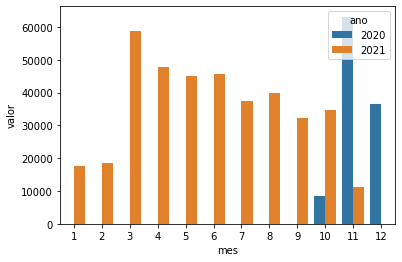

In [20]:
#Analisando os pagamentos mensais
agrupamento_mes_pago = tb_customer_payments[tb_customer_payments['status_pagamento'] == 'PAID'].groupby(['ano', 'mes'])['valor'].sum()
agrupamento_mes_pago = pd.DataFrame(agrupamento_mes_pago).reset_index()
sns.barplot(data=agrupamento_mes_pago, x=agrupamento_mes_pago['mes'], 
            y=agrupamento_mes_pago['valor'], hue=agrupamento_mes_pago['ano'])

<AxesSubplot:xlabel='quarter', ylabel='valor'>

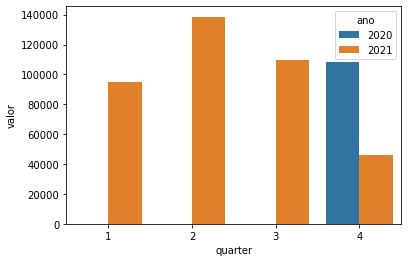

In [21]:
agrupamento_mes_pago = tb_customer_payments[tb_customer_payments['status_pagamento'] == 'PAID'].groupby(['ano', 'quarter'])['valor'].sum()
agrupamento_mes_pago = pd.DataFrame(agrupamento_mes_pago).reset_index()
sns.barplot(data=agrupamento_mes_pago, x=agrupamento_mes_pago['quarter'], 
            y=agrupamento_mes_pago['valor'], hue=agrupamento_mes_pago['ano'])

In [22]:
#vendo meses com mais cupons 
tb_coupons = pd.read_csv('Dados Nestle/tb_coupons.csv', sep=";")
tb_coupons.head()

,id_cupons,pode_usar_outros_codigos,limite_custo,data_fim,cupom_codigo,entrega_free,valido_somente_novos_clientes,valor_minimo,data_inicio,status,tipo,quem_paga_cupom,dias_duracao,novos_clientes_adquiridos,qtde_uso,valor_total_uso,percentagem,valor_fixo,limite_uso_por_cpf,limite_uso
0,5f9dd4629edca400210011ca,False,20000.0,2020-11-17 03:00:00,FRIDAY60,True,False,60.0,2020-11-01 03:00:00,INACTIVE,FIXED_DISCOUNT,PLATFORM,-16.0,34.0,40.0,1007.37,NaN,NaN,NaN,NaN
1,5f9dd6d79edca4002100154b,False,NaN,2021-03-24 03:00:00,#TimeQuerido,True,False,NaN,NaN,ACTIVE,PERCENT_DISCOUNT,PLATFORM,NaN,NaN,4.0,121.44,20.0,NaN,NaN,NaN
2,5fa46012903a35002117a6ad,False,6000.0,2020-12-25 03:00:00,FRIDAY2060,True,False,60.0,2020-11-05 03:00:00,INACTIVE,FIXED_DISCOUNT,PLATFORM,-50.0,9.0,12.0,240.00,NaN,20.0,2.0,50.0
3,5fa9ad19ce7202002177907f,False,NaN,2020-12-30 03:00:00,LOOVEM,False,False,70.0,2020-11-09 03:00:00,ACTIVE,PERCENT_DISCOUNT,PLATFORM,-51.0,NaN,NaN,NaN,15.0,NaN,1.0,300.0
4,5fad8b562929b600211a7614,False,2000.0,2021-04-30 03:00:00,#eliana,False,False,NaN,2021-04-19 03:00:00,ACTIVE,PERCENT_DISCOUNT,PLATFORM,-11.0,56.0,83.0,1140.03,15.0,NaN,2.0,NaN


In [23]:
#Fazendo analise grossa (não considerando a diversos meses de cupons, apenas o inicio)
tb_coupons['data_correta_inico'] = pd.to_datetime(tb_coupons['data_inicio'])
tb_coupons['mes_inicio_cupom'] = tb_coupons['data_correta_inico'].apply(lambda x: x.month)
tb_coupons['dia_inicio_cupom'] = tb_coupons['data_correta_inico'].apply(lambda x: x.day)
tb_coupons['ano_inicio_cupom'] = tb_coupons['data_correta_inico'].apply(lambda x: x.year)
agrupamento_data_inicio_cupons = pd.DataFrame(tb_coupons.groupby(['ano_inicio_cupom', 'mes_inicio_cupom'])['novos_clientes_adquiridos'].sum()).reset_index()
agrupamento_data_inicio_cupons_total = pd.DataFrame(tb_coupons.groupby(['ano_inicio_cupom', 'mes_inicio_cupom'])['qtde_uso'].sum()).reset_index()
agrupamento_data_inicio_cupons_final = pd.merge(agrupamento_data_inicio_cupons, agrupamento_data_inicio_cupons_total, how='left', on = ['ano_inicio_cupom', 'mes_inicio_cupom'])
agrupamento_data_inicio_cupons_final.head()

,ano_inicio_cupom,mes_inicio_cupom,novos_clientes_adquiridos,qtde_uso
0,2020.0,11.0,253.0,369.0
1,2020.0,12.0,40.0,69.0
2,2021.0,1.0,8.0,10.0
3,2021.0,2.0,81.0,170.0
4,2021.0,3.0,64.0,126.0


In [24]:
agrupamento_data_inicio_cupons_final['base_clientes'] = agrupamento_data_inicio_cupons_final['qtde_uso'] - agrupamento_data_inicio_cupons_final['novos_clientes_adquiridos']
agrupamento_data_inicio_cupons_final.head(14)

,ano_inicio_cupom,mes_inicio_cupom,novos_clientes_adquiridos,qtde_uso,base_clientes
0,2020.0,11.0,253.0,369.0,116.0
1,2020.0,12.0,40.0,69.0,29.0
2,2021.0,1.0,8.0,10.0,2.0
3,2021.0,2.0,81.0,170.0,89.0
4,2021.0,3.0,64.0,126.0,62.0
5,2021.0,4.0,216.0,402.0,186.0
6,2021.0,5.0,77.0,186.0,109.0
7,2021.0,6.0,69.0,156.0,87.0
8,2021.0,7.0,100.0,273.0,173.0
9,2021.0,8.0,109.0,227.0,118.0


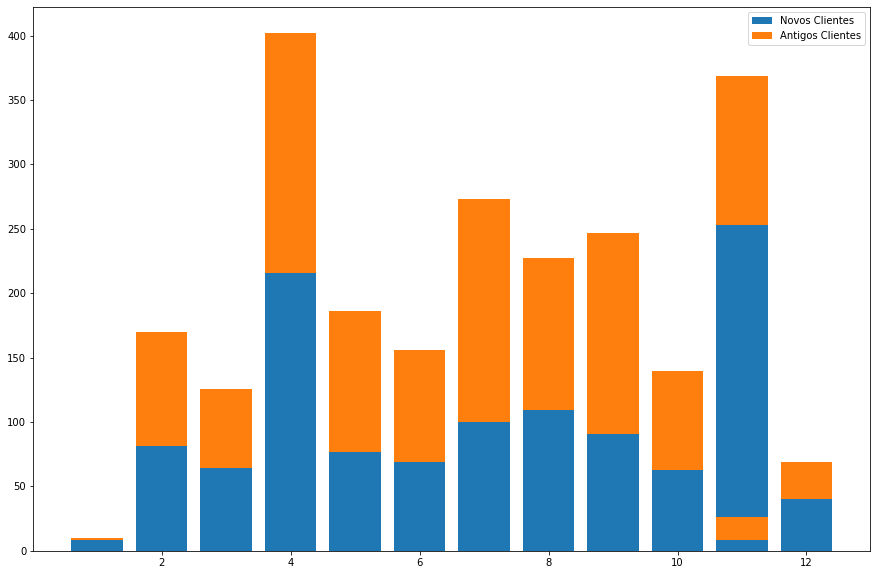

In [25]:
fig, ax = plt.subplots(figsize = (15,10))
ax.bar(x=agrupamento_data_inicio_cupons_final['mes_inicio_cupom'], 
        height =  agrupamento_data_inicio_cupons_final['novos_clientes_adquiridos'], label = 'Novos Clientes', )
ax.bar(x=agrupamento_data_inicio_cupons_final['mes_inicio_cupom'],
        height =  agrupamento_data_inicio_cupons_final['base_clientes'], label = 'Antigos Clientes', bottom = agrupamento_data_inicio_cupons_final['novos_clientes_adquiridos'])
ax.legend()
plt.show()

In [26]:
#realizando junção com endereços
produto_vendors_address = pd.merge(produto_vendors, tb_address, how='left', on = 'id_endereco')
produto_vendors_address.head()

,id_fornecedor_x,nome_fornecedor,data_registro,qtde_produtos,preco_medio,avaliacao_media_x,e_aprovado,nome_empresa,id_endereco,delivery_raio_km,...,avaliacao_media_y,id_fornecedor_y,bairro,ponto_referencia,cidade,estado,uf,pais,tipo,cep
0,5f550609cba01d00210ed015,Meus Bolos,2020-09-06 00:42:34,0,0,0,False,Mwyhs Umprdss Ltds.,5f550609cba01d00210ed016,20,...,0.00,5f550609cba01d00210ed015,Taquaral,NaN,Campinas,SP,SP,Brasil,HISTORY,13000001.0
1,5f550609cba01d00210ed015,Meus Bolos,2020-09-06 00:42:34,0,0,0,False,Mwyhs Umprdss Ltds.,5f550609cba01d00210ed016,20,...,0.00,5f550609cba01d00210ed015,Taquaral,NaN,Campinas,SP,SP,Brasil,HISTORY,13000001.0
2,5f550609cba01d00210ed015,Meus Bolos,2020-09-06 00:42:34,0,0,0,False,Mwyhs Umprdss Ltds.,5f550609cba01d00210ed016,20,...,4.92,5f550609cba01d00210ed015,Taquaral,NaN,Campinas,SP,SP,Brasil,HISTORY,13000001.0
3,5f584189fc58110021464422,Moça Doceria,2020-09-09 01:56:25,0,0,0,False,BUSTLU BRRSIL LTDR.,5f584189fc58110021464423,13,...,0.00,5f584189fc58110021464422,Campo Belo,Ateliê do Doce,São Paulo,São Paulo,SP,Brasil,OFFICE,1000001.0
4,5f584189fc58110021464422,Moça Doceria,2020-09-09 01:56:25,0,0,0,False,BUSTLU BRRSIL LTDR.,5f584189fc58110021464423,13,...,0.00,5f584189fc58110021464422,Campo Belo,Ateliê do Doce,São Paulo,São Paulo,SP,Brasil,OFFICE,1000001.0


In [27]:
print(f'tamanho do dataframe é {produto_vendors_address.shape}')

tamanho do dataframe é (3320, 35)


In [28]:
#Análise das informações do daraframe
produto_vendors_address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 0 to 3319
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_fornecedor_x           3320 non-null   object 
 1   nome_fornecedor           3320 non-null   object 
 2   data_registro             3320 non-null   object 
 3   qtde_produtos             3320 non-null   int64  
 4   preco_medio               3320 non-null   int64  
 5   avaliacao_media_x         3320 non-null   int64  
 6   e_aprovado                3320 non-null   bool   
 7   nome_empresa              3320 non-null   object 
 8   id_endereco               3320 non-null   object 
 9   delivery_raio_km          3320 non-null   int64  
 10  delivery_sistema          646 non-null    object 
 11  hora_abertura             3320 non-null   object 
 12  hora_fechamento           3320 non-null   object 
 13  data_aprovacao            3034 non-null   object 
 14  data_rep

In [29]:
#montando uma base correta
vendedores_endereco = tb_vendors.merge(tb_address, how = 'left', on = 'id_endereco')
vendedores_endereco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 402
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_fornecedor_x   403 non-null    object 
 1   nome_fornecedor   403 non-null    object 
 2   data_registro     403 non-null    object 
 3   qtde_produtos     403 non-null    int64  
 4   preco_medio       403 non-null    int64  
 5   avaliacao_media   403 non-null    int64  
 6   e_aprovado        403 non-null    bool   
 7   nome_empresa      403 non-null    object 
 8   id_endereco       403 non-null    object 
 9   delivery_raio_km  403 non-null    int64  
 10  delivery_sistema  36 non-null     object 
 11  hora_abertura     403 non-null    object 
 12  hora_fechamento   403 non-null    object 
 13  data_aprovacao    194 non-null    object 
 14  data_reprovacao   139 non-null    object 
 15  id_fornecedor_y   403 non-null    object 
 16  bairro            397 non-null    object 
 1

In [30]:
#pegando as cidades
tb_cities = pd.read_csv('Dados Nestle/tb_cities.csv', sep = ';')
vendedores_endereco_cidades = vendedores_endereco.merge(tb_cities, how='left', left_on=['cidade', 'uf'], right_on=['cidade', 'uf'])
vendedores_endereco_cidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 402
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_fornecedor_x   403 non-null    object 
 1   nome_fornecedor   403 non-null    object 
 2   data_registro     403 non-null    object 
 3   qtde_produtos     403 non-null    int64  
 4   preco_medio       403 non-null    int64  
 5   avaliacao_media   403 non-null    int64  
 6   e_aprovado        403 non-null    bool   
 7   nome_empresa      403 non-null    object 
 8   id_endereco       403 non-null    object 
 9   delivery_raio_km  403 non-null    int64  
 10  delivery_sistema  36 non-null     object 
 11  hora_abertura     403 non-null    object 
 12  hora_fechamento   403 non-null    object 
 13  data_aprovacao    194 non-null    object 
 14  data_reprovacao   139 non-null    object 
 15  id_fornecedor_y   403 non-null    object 
 16  bairro            397 non-null    object 
 1

In [31]:
vendedores_endereco_cidades.to_excel('Tabela_Vendedores.xlsx')

In [32]:
vendedores_endereco_cidades[vendedores_endereco_cidades['esta_disponivel'] == True]['cidade'].value_counts()

São Paulo      298
Santo André      6
Name: cidade, dtype: int64

<p style = 'font-size: 20px; font-family:consolas; color: yellow'>
        Temos duas cidades e o maior foco de endereço dos vendedores é a cidade de São Paulo e em segundo temos Santo André!
</p>

In [33]:
#Limpando as colunas 
vendedores_endereco_cidades.columns

Index(['id_fornecedor_x', 'nome_fornecedor', 'data_registro', 'qtde_produtos',
       'preco_medio', 'avaliacao_media', 'e_aprovado', 'nome_empresa',
       'id_endereco', 'delivery_raio_km', 'delivery_sistema', 'hora_abertura',
       'hora_fechamento', 'data_aprovacao', 'data_reprovacao',
       'id_fornecedor_y', 'bairro', 'ponto_referencia', 'cidade', 'estado_x',
       'uf', 'pais_x', 'tipo', 'cep', 'id_cidade', 'esta_disponivel',
       'estado_y', 'pais_y'],
      dtype='object')

In [34]:
#dropando colunas desnecessárias
#vendedores_endereco_cidades.drop(['id_fornecedor_y', 'estado_y', 'pais_y'], axis=1, inplace=True)
vendedores_endereco_cidades.columns

Index(['id_fornecedor_x', 'nome_fornecedor', 'data_registro', 'qtde_produtos',
       'preco_medio', 'avaliacao_media', 'e_aprovado', 'nome_empresa',
       'id_endereco', 'delivery_raio_km', 'delivery_sistema', 'hora_abertura',
       'hora_fechamento', 'data_aprovacao', 'data_reprovacao',
       'id_fornecedor_y', 'bairro', 'ponto_referencia', 'cidade', 'estado_x',
       'uf', 'pais_x', 'tipo', 'cep', 'id_cidade', 'esta_disponivel',
       'estado_y', 'pais_y'],
      dtype='object')

In [35]:
#Agora que nós eliminamos as colunas que não queriamos, vamos cruzar zonas
zonas_sp = pd.read_excel(r'Dados Nestle/Zonas.xlsx')
zonas_sp2 = pd.read_excel(r'Dados Nestle/Zonas_2.xlsx')
zonas_sp.head()

,bairro,Região
0,Água Rasa,Zona Leste
1,Água Branca,Zona Oeste
2,Água Funda,Zona Sul
3,Alto da Baronesa,Zona Sul
4,Alto da Boa Vista,Zona Sul


In [36]:
#Agora vamos entar cruzar os dados
vendedores_final = vendedores_endereco_cidades.merge(zonas_sp2, how = 'left', on='bairro')
vendedores_final['Zona'].value_counts()

Zona Sul        107
Zona Norte       91
Zona Leste       87
Zona Oeste       56
Zona Central     19
Name: Zona, dtype: int64

In [37]:
vendedores_final.loc[(vendedores_final['Zona'].isnull()) & (vendedores_final['cidade'] != 'São Paulo'), 'Zona'] = 'Outros'
vendedores_final['Zona'].unique()

array(['Outros', 'Zona Sul', 'Zona Norte', 'Zona Leste', 'Zona Oeste',
       'Zona Central'], dtype=object)

In [38]:
vendedores_final.to_excel('vendedores_zonas.xlsx')
vendedores_final.columns

Index(['id_fornecedor_x', 'nome_fornecedor', 'data_registro', 'qtde_produtos',
       'preco_medio', 'avaliacao_media', 'e_aprovado', 'nome_empresa',
       'id_endereco', 'delivery_raio_km', 'delivery_sistema', 'hora_abertura',
       'hora_fechamento', 'data_aprovacao', 'data_reprovacao',
       'id_fornecedor_y', 'bairro', 'ponto_referencia', 'cidade', 'estado_x',
       'uf', 'pais_x', 'tipo', 'cep', 'id_cidade', 'esta_disponivel',
       'estado_y', 'pais_y', 'Zona', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')

In [39]:
#pegando tabela de ordens
orders = pd.read_csv('Dados Nestle/tb_ordered_products.csv', sep = ';')

In [40]:
#Fundindo pagamentos
tb_vendor_payments = pd.read_csv('Dados Nestle/tb_vendor_payments.csv', sep = ';')
pag_client_forn = tb_customer_payments.merge(tb_vendor_payments, how = 'left', left_on = 'id_ordens', right_on='id_ordem')
pag_client_forn.head()
print(pag_client_forn.shape)
print(vendedores_final.shape)

(35651, 18)
(457, 32)


In [41]:
#Cruzanmento final, cruzando com id fornecedor nossa tabela de fornecedores
pagamento_final = pag_client_forn.merge(vendedores_final, how= 'left', left_on='id_fornecedor', right_on='id_fornecedor_x')
pagamento_final.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis = 1, inplace=True)

In [42]:
pagamento_final.head()

,id_ordens,id_pagamentos_cliente,id_cliente,data_pagamento,valor,status_pagamento,metodo_pagamento,data_correta,dia,semana,...,estado_x,uf,pais_x,tipo,cep,id_cidade,esta_disponivel,estado_y,pais_y,Zona
0,5f6a1ff1f309620021ca2822,5f6a273a7ebe070021027a36,5f6a1912f309620021ca2652,2020-09-22 16:32:58,1.10,PAID,CREDIT,2020-09-22 16:32:58,22,39,...,SP,SP,Brasil,HISTORY,13000001.0,5f517b48c13e960021459f0c,False,São Paulo,Brasil,Outros
1,5f6a2f3d5e18160021760db8,5f6a321a5e18160021760eba,5f6a2e615e18160021760dae,2020-09-22 17:19:22,4.60,PAID,CREDIT,2020-09-22 17:19:22,22,39,...,SP,SP,Brasil,HISTORY,13000001.0,5f517b48c13e960021459f0c,False,São Paulo,Brasil,Outros
2,5f6a378a5e18160021760f6a,5f6a37fd5e18160021760f76,5f6a37165e18160021760f60,2020-09-22 17:44:29,2.00,PAID,CREDIT,2020-09-22 17:44:29,22,39,...,SP,SP,Brasil,HISTORY,13000001.0,5f517b48c13e960021459f0c,False,São Paulo,Brasil,Outros
3,5f777fa2333d3e0021f11d20,5f777ffe333d3e0021f11d43,5f6a2e615e18160021760dae,2020-10-02 19:31:10,70.00,PAID,CREDIT,2020-10-02 19:31:10,2,40,...,São Paulo,SP,Brasil,OFFICE,1000001.0,5f6a179af309620021ca264d,True,São Paulo,Brasil,Zona Sul
4,5f7dc741f266b40021daedb8,5f7dc7aef266b40021daee11,5f6a37165e18160021760f60,2020-10-07 13:50:38,99.81,PAID,CREDIT,2020-10-07 13:50:38,7,41,...,São Paulo,SP,Brasil,OFFICE,1000001.0,5f6a179af309620021ca264d,True,São Paulo,Brasil,Zona Sul


In [43]:
#salvando em excel
pagamento_final.to_excel('pagamento_final.xlsx')

In [44]:
#Vamos agora montar uma tabela de vendedores
tb_users = pd.read_csv('Dados Nestle/tb_users.csv', sep = ';')
tb_users = tb_users.iloc[:,[0, 1, 2]]

In [45]:
tb_users.head()

,id_usuario,id_fornecedor,nome_completo
0,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv
1,5fab1e6219bbc50021fec9b0,5fab1fd219bbc50021fecfbe,Swmhyd Rdgwys dd Frdwtss
2,5fab2c8519bbc50021feee65,5fab2cd619bbc50021feef1b,Fdrysydh Msrtwys
3,5fab65294d36ff0021e3052a,NaN,Rdrwsys rhdrwguds slvds
4,5fab9bf04d36ff0021e32b96,NaN,Rhbshy Guwlhdrmd Ds Swlvs


In [92]:
users_produtos = tb_users.merge(tb_customer_payments, how = 'left', left_on = 'id_usuario', right_on='id_cliente')
users_produtos.head()

,id_usuario,id_fornecedor,nome_completo,id_ordens,id_pagamentos_cliente,id_cliente,data_pagamento,valor,status_pagamento,metodo_pagamento,data_correta,dia,semana,mes,hora,ano,quarter
0,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,5faafe7a19bbc50021fe4585,5fad962f2929b600211aa8ff,5faafcaf19bbc50021fe3f07,2020-11-12 20:08:15,65.22,PAID,CREDIT,2020-11-12 20:08:15,12.0,46.0,11.0,20.0,2020.0,4.0
1,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,5fd7d7d058765700224590f9,5fd7d9015876570022459783,5faafcaf19bbc50021fe3f07,2020-12-14 21:28:33,59.50,PAID,CREDIT,2020-12-14 21:28:33,14.0,51.0,12.0,21.0,2020.0,4.0
2,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,6001a561ac574400215eb578,6001add2ac574400215ebe70,5faafcaf19bbc50021fe3f07,2021-01-15 14:59:31,69.90,PAID,CREDIT,2021-01-15 14:59:31,15.0,2.0,1.0,14.0,2021.0,1.0
3,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,60412569317f730021f5371d,6041265c317f730021f537d7,5faafcaf19bbc50021fe3f07,2021-03-04 18:26:36,69.90,PAID,CREDIT,2021-03-04 18:26:36,4.0,9.0,3.0,18.0,2021.0,1.0
4,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,607ef74bde42920021370a7d,607f3a866d74880021c6a382,5faafcaf19bbc50021fe3f07,2021-04-20 20:33:10,66.00,PAID,CREDIT,2021-04-20 20:33:10,20.0,16.0,4.0,20.0,2021.0,2.0


In [93]:
users_produtos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12242 entries, 0 to 12241
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_usuario             12242 non-null  object        
 1   id_fornecedor          411 non-null    object        
 2   nome_completo          11840 non-null  object        
 3   id_ordens              8295 non-null   object        
 4   id_pagamentos_cliente  8295 non-null   object        
 5   id_cliente             8295 non-null   object        
 6   data_pagamento         8295 non-null   object        
 7   valor                  8295 non-null   float64       
 8   status_pagamento       8295 non-null   object        
 9   metodo_pagamento       8295 non-null   object        
 10  data_correta           8295 non-null   datetime64[ns]
 11  dia                    8295 non-null   float64       
 12  semana                 8295 non-null   float64       
 13  m

In [94]:
users_produtos_pago = users_produtos[users_produtos['status_pagamento'] == 'PAID']
users_produtos_pago['status_pagamento'].unique()

array(['PAID'], dtype=object)

In [95]:
users_produtos_pago.sort_values('data_correta', inplace=True, ascending=False)
users_produtos_pagos_unique = users_produtos_pago.drop_duplicates(subset=['id_usuario'], keep='first')
len(users_produtos_pagos_unique[['id_usuario']])

<ipython-input-95-65417f4febe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_produtos_pago.sort_values('data_correta', inplace=True, ascending=False)


2679

In [96]:
users_produtos_pagos_unique.head()

,id_usuario,id_fornecedor,nome_completo,id_ordens,id_pagamentos_cliente,id_cliente,data_pagamento,valor,status_pagamento,metodo_pagamento,data_correta,dia,semana,mes,hora,ano,quarter
12235,618c65213678e6002238dec9,NaN,Rhbdrts Olwvdwrs Sdrvwlhs,618c65993678e6002238e020,618c67013678e6002238e276,618c65213678e6002238dec9,2021-11-11 00:42:41,55.00,PAID,CREDIT,2021-11-11 00:42:41,11.0,45.0,11.0,0.0,2021.0,4.0
10095,60648ca6c159b600211768a5,NaN,Jhwcd Dsysyd Tsvsrds,618c5bf73678e6002238cc00,618c5dfb3678e6002238d009,60648ca6c159b600211768a5,2021-11-11 00:04:11,124.90,PAID,CREDIT,2021-11-11 00:04:11,11.0,45.0,11.0,0.0,2021.0,4.0
11500,613fb0899839b700223a4059,NaN,Issbdls Isswss Hdrysydds,618c425624f5f60022d28bb1,618c447924f5f60022d28fa3,613fb0899839b700223a4059,2021-11-10 22:15:21,55.00,PAID,CREDIT,2021-11-10 22:15:21,10.0,45.0,11.0,22.0,2021.0,4.0
7905,6093fad4f10a410021150a0b,NaN,Vwthr Frsycwsch Msrtwys Lwms,618c346624f5f60022d2635d,618c36eb24f5f60022d26c78,6093fad4f10a410021150a0b,2021-11-10 21:17:31,120.00,PAID,CREDIT,2021-11-10 21:17:31,10.0,45.0,11.0,21.0,2021.0,4.0
12230,618c132624f5f60022d16984,NaN,Julwsys Crwstwys,618c182524f5f60022d17e4a,618c2a6724f5f60022d23a8e,618c132624f5f60022d16984,2021-11-10 20:24:07,47.07,PAID,CREDIT,2021-11-10 20:24:07,10.0,45.0,11.0,20.0,2021.0,4.0


In [97]:
len(users_produtos_pagos_unique['id_usuario'])

2679

In [98]:
agrupamento_users = pd.DataFrame(users_produtos_pago.groupby('id_usuario')['valor'].sum())
agrupamento_users.head()

,valor
id_usuario,
5f550609cba01d00210ed014,6.00
5f590e965e6f42002162d15c,1090.15
5f592d8b5e6f42002162d15f,70.00
5f61627c034e1b5dfe2f4ab3,2247.73
5f6a1912f309620021ca2652,1.10


In [99]:
agrupamento_users.reset_index(inplace=True)
agrupamento_users.head()

,id_usuario,valor
0,5f550609cba01d00210ed014,6.00
1,5f590e965e6f42002162d15c,1090.15
2,5f592d8b5e6f42002162d15f,70.00
3,5f61627c034e1b5dfe2f4ab3,2247.73
4,5f6a1912f309620021ca2652,1.10


In [100]:
agrupamento_users.columns = agrupamento_users.columns.map(lambda x: 'total_comprado' if x == 'valor' else x)
agrupamento_users.head()

,id_usuario,total_comprado
0,5f550609cba01d00210ed014,6.00
1,5f590e965e6f42002162d15c,1090.15
2,5f592d8b5e6f42002162d15f,70.00
3,5f61627c034e1b5dfe2f4ab3,2247.73
4,5f6a1912f309620021ca2652,1.10


In [101]:
users_produtos_pagos_unique = users_produtos_pagos_unique.merge(agrupamento_users, how = 'left', on='id_usuario')
users_produtos_pagos_unique.head()

,id_usuario,id_fornecedor,nome_completo,id_ordens,id_pagamentos_cliente,id_cliente,data_pagamento,valor,status_pagamento,metodo_pagamento,data_correta,dia,semana,mes,hora,ano,quarter,total_comprado
0,618c65213678e6002238dec9,NaN,Rhbdrts Olwvdwrs Sdrvwlhs,618c65993678e6002238e020,618c67013678e6002238e276,618c65213678e6002238dec9,2021-11-11 00:42:41,55.00,PAID,CREDIT,2021-11-11 00:42:41,11.0,45.0,11.0,0.0,2021.0,4.0,55.00
1,60648ca6c159b600211768a5,NaN,Jhwcd Dsysyd Tsvsrds,618c5bf73678e6002238cc00,618c5dfb3678e6002238d009,60648ca6c159b600211768a5,2021-11-11 00:04:11,124.90,PAID,CREDIT,2021-11-11 00:04:11,11.0,45.0,11.0,0.0,2021.0,4.0,164.80
2,613fb0899839b700223a4059,NaN,Issbdls Isswss Hdrysydds,618c425624f5f60022d28bb1,618c447924f5f60022d28fa3,613fb0899839b700223a4059,2021-11-10 22:15:21,55.00,PAID,CREDIT,2021-11-10 22:15:21,10.0,45.0,11.0,22.0,2021.0,4.0,150.00
3,6093fad4f10a410021150a0b,NaN,Vwthr Frsycwsch Msrtwys Lwms,618c346624f5f60022d2635d,618c36eb24f5f60022d26c78,6093fad4f10a410021150a0b,2021-11-10 21:17:31,120.00,PAID,CREDIT,2021-11-10 21:17:31,10.0,45.0,11.0,21.0,2021.0,4.0,210.27
4,618c132624f5f60022d16984,NaN,Julwsys Crwstwys,618c182524f5f60022d17e4a,618c2a6724f5f60022d23a8e,618c132624f5f60022d16984,2021-11-10 20:24:07,47.07,PAID,CREDIT,2021-11-10 20:24:07,10.0,45.0,11.0,20.0,2021.0,4.0,47.07


In [102]:
#users_produtos_pagos_unique.drop(['valor', 'data_pagamento'], axis = 1, inplace=True)
users_produtos_pagos_unique.columns = users_produtos_pagos_unique.columns.map(lambda x: 'data_ultima_compra' if x == 'data_correta' else x)
users_produtos_pagos_unique.head()

,id_usuario,id_fornecedor,nome_completo,id_ordens,id_pagamentos_cliente,id_cliente,data_pagamento,valor,status_pagamento,metodo_pagamento,data_ultima_compra,dia,semana,mes,hora,ano,quarter,total_comprado
0,618c65213678e6002238dec9,NaN,Rhbdrts Olwvdwrs Sdrvwlhs,618c65993678e6002238e020,618c67013678e6002238e276,618c65213678e6002238dec9,2021-11-11 00:42:41,55.00,PAID,CREDIT,2021-11-11 00:42:41,11.0,45.0,11.0,0.0,2021.0,4.0,55.00
1,60648ca6c159b600211768a5,NaN,Jhwcd Dsysyd Tsvsrds,618c5bf73678e6002238cc00,618c5dfb3678e6002238d009,60648ca6c159b600211768a5,2021-11-11 00:04:11,124.90,PAID,CREDIT,2021-11-11 00:04:11,11.0,45.0,11.0,0.0,2021.0,4.0,164.80
2,613fb0899839b700223a4059,NaN,Issbdls Isswss Hdrysydds,618c425624f5f60022d28bb1,618c447924f5f60022d28fa3,613fb0899839b700223a4059,2021-11-10 22:15:21,55.00,PAID,CREDIT,2021-11-10 22:15:21,10.0,45.0,11.0,22.0,2021.0,4.0,150.00
3,6093fad4f10a410021150a0b,NaN,Vwthr Frsycwsch Msrtwys Lwms,618c346624f5f60022d2635d,618c36eb24f5f60022d26c78,6093fad4f10a410021150a0b,2021-11-10 21:17:31,120.00,PAID,CREDIT,2021-11-10 21:17:31,10.0,45.0,11.0,21.0,2021.0,4.0,210.27
4,618c132624f5f60022d16984,NaN,Julwsys Crwstwys,618c182524f5f60022d17e4a,618c2a6724f5f60022d23a8e,618c132624f5f60022d16984,2021-11-10 20:24:07,47.07,PAID,CREDIT,2021-11-10 20:24:07,10.0,45.0,11.0,20.0,2021.0,4.0,47.07


In [103]:
agrupamento_compras = pd.DataFrame(users_produtos[users_produtos['status_pagamento'] == 'PAID'].groupby(['id_usuario'])['status_pagamento'].count())
agrupamento_compras.reset_index(inplace = True)
agrupamento_compras.columns = agrupamento_compras.columns.map(lambda x: 'quantidade_compras' if x == 'status_pagamento' else x)
agrupamento_compras.head()

,id_usuario,quantidade_compras
0,5f550609cba01d00210ed014,4
1,5f590e965e6f42002162d15c,7
2,5f592d8b5e6f42002162d15f,1
3,5f61627c034e1b5dfe2f4ab3,14
4,5f6a1912f309620021ca2652,1


In [104]:
agrupamento_reembolso= pd.DataFrame(users_produtos[(users_produtos['status_pagamento'] != 'PAID') & (users_produtos['status_pagamento'] != 'REFUSED')].groupby(['id_usuario'])['status_pagamento'].count())
agrupamento_reembolso.reset_index(inplace = True)
agrupamento_reembolso.columns = agrupamento_reembolso.columns.map(lambda x: 'quantidade_reembolsos' if x == 'status_pagamento' else x)
agrupamento_reembolso.head()

,id_usuario,quantidade_reembolsos
0,5f514d7e92d0a8aadffa859a,0
1,5f58371dfc58110021464421,0
2,5f592d8b5e6f42002162d15f,2
3,5f5a8b56ccc6c40021a8185e,0
4,5f5bc1efb8742200213bda1c,0


In [105]:
agrupamento_negado= pd.DataFrame(users_produtos[(users_produtos['status_pagamento'] == 'REFUSED')].groupby(['id_usuario'])['status_pagamento'].count())
agrupamento_negado.reset_index(inplace = True)
agrupamento_negado.columns = agrupamento_negado.columns.map(lambda x: 'quantidade_negados' if x == 'status_pagamento' else x)
agrupamento_negado.head()

,id_usuario,quantidade_negados
0,5f550609cba01d00210ed014,1
1,5f590e965e6f42002162d15c,7
2,5f592d8b5e6f42002162d15f,1
3,5f61627c034e1b5dfe2f4ab3,12
4,5f6a2e615e18160021760dae,1


In [106]:
agrupamento_reembolso_total = pd.DataFrame(users_produtos[(users_produtos['status_pagamento'] != 'PAID') & (users_produtos['status_pagamento'] != 'REFUSED')].groupby(['id_usuario'])['valor'].sum())
agrupamento_reembolso_total.reset_index(inplace = True)
agrupamento_reembolso_total.columns = agrupamento_reembolso_total.columns.map(lambda x: 'total_reembolsos' if x == 'valor' else x)
agrupamento_reembolso_total.head()

,id_usuario,total_reembolsos
0,5f514d7e92d0a8aadffa859a,0.00
1,5f58371dfc58110021464421,0.00
2,5f592d8b5e6f42002162d15f,128.51
3,5f5a8b56ccc6c40021a8185e,0.00
4,5f5bc1efb8742200213bda1c,0.00


In [107]:
agrupamento_negado_total= pd.DataFrame(users_produtos[(users_produtos['status_pagamento'] == 'REFUSED')].groupby(['id_usuario'])['valor'].sum())
agrupamento_negado_total.reset_index(inplace = True)
agrupamento_negado_total.columns = agrupamento_negado_total.columns.map(lambda x: 'total_negado' if x == 'valor' else x)
agrupamento_negado_total.head()

,id_usuario,total_negado
0,5f550609cba01d00210ed014,160.00
1,5f590e965e6f42002162d15c,751.11
2,5f592d8b5e6f42002162d15f,25.50
3,5f61627c034e1b5dfe2f4ab3,2311.18
4,5f6a2e615e18160021760dae,423.46


In [108]:
users_produtos = users_produtos.merge(agrupamento_users, how = 'left', on='id_usuario')
users_produtos = users_produtos.merge(agrupamento_compras, how = 'left', on='id_usuario')
users_produtos = users_produtos.merge(agrupamento_reembolso, how = 'left', on='id_usuario')
users_produtos = users_produtos.merge(agrupamento_reembolso_total, how = 'left', on='id_usuario')
users_produtos = users_produtos.merge(agrupamento_negado, how = 'left', on='id_usuario')
users_produtos = users_produtos.merge(agrupamento_negado_total, how = 'left', on='id_usuario')
users_produtos.head()

,id_usuario,id_fornecedor,nome_completo,id_ordens,id_pagamentos_cliente,id_cliente,data_pagamento,valor,status_pagamento,metodo_pagamento,...,mes,hora,ano,quarter,total_comprado,quantidade_compras,quantidade_reembolsos,total_reembolsos,quantidade_negados,total_negado
0,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,5faafe7a19bbc50021fe4585,5fad962f2929b600211aa8ff,5faafcaf19bbc50021fe3f07,2020-11-12 20:08:15,65.22,PAID,CREDIT,...,11.0,20.0,2020.0,4.0,408.92,6.0,NaN,NaN,NaN,NaN
1,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,5fd7d7d058765700224590f9,5fd7d9015876570022459783,5faafcaf19bbc50021fe3f07,2020-12-14 21:28:33,59.50,PAID,CREDIT,...,12.0,21.0,2020.0,4.0,408.92,6.0,NaN,NaN,NaN,NaN
2,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,6001a561ac574400215eb578,6001add2ac574400215ebe70,5faafcaf19bbc50021fe3f07,2021-01-15 14:59:31,69.90,PAID,CREDIT,...,1.0,14.0,2021.0,1.0,408.92,6.0,NaN,NaN,NaN,NaN
3,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,60412569317f730021f5371d,6041265c317f730021f537d7,5faafcaf19bbc50021fe3f07,2021-03-04 18:26:36,69.90,PAID,CREDIT,...,3.0,18.0,2021.0,1.0,408.92,6.0,NaN,NaN,NaN,NaN
4,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,607ef74bde42920021370a7d,607f3a866d74880021c6a382,5faafcaf19bbc50021fe3f07,2021-04-20 20:33:10,66.00,PAID,CREDIT,...,4.0,20.0,2021.0,2.0,408.92,6.0,NaN,NaN,NaN,NaN


In [110]:
users_produtos.columns

Index(['id_usuario', 'id_fornecedor', 'nome_completo', 'id_ordens',
       'id_pagamentos_cliente', 'id_cliente', 'data_pagamento', 'valor',
       'status_pagamento', 'metodo_pagamento', 'data_correta', 'dia', 'semana',
       'mes', 'hora', 'ano', 'quarter', 'total_comprado', 'quantidade_compras',
       'quantidade_reembolsos', 'total_reembolsos', 'quantidade_negados',
       'total_negado'],
      dtype='object')

In [112]:
users_produtos.fillna({'total_comprado':0 , 'quantidade_compras': 0,
       'quantidade_reembolsos': 0, 'total_reembolsos': 0, 'quantidade_negados': 0,
       'total_negado': 0}, inplace=True)

In [113]:
users_produtos.head()

,id_usuario,id_fornecedor,nome_completo,id_ordens,id_pagamentos_cliente,id_cliente,data_pagamento,valor,status_pagamento,metodo_pagamento,...,mes,hora,ano,quarter,total_comprado,quantidade_compras,quantidade_reembolsos,total_reembolsos,quantidade_negados,total_negado
0,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,5faafe7a19bbc50021fe4585,5fad962f2929b600211aa8ff,5faafcaf19bbc50021fe3f07,2020-11-12 20:08:15,65.22,PAID,CREDIT,...,11.0,20.0,2020.0,4.0,408.92,6.0,0.0,0.0,0.0,0.0
1,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,5fd7d7d058765700224590f9,5fd7d9015876570022459783,5faafcaf19bbc50021fe3f07,2020-12-14 21:28:33,59.50,PAID,CREDIT,...,12.0,21.0,2020.0,4.0,408.92,6.0,0.0,0.0,0.0,0.0
2,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,6001a561ac574400215eb578,6001add2ac574400215ebe70,5faafcaf19bbc50021fe3f07,2021-01-15 14:59:31,69.90,PAID,CREDIT,...,1.0,14.0,2021.0,1.0,408.92,6.0,0.0,0.0,0.0,0.0
3,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,60412569317f730021f5371d,6041265c317f730021f537d7,5faafcaf19bbc50021fe3f07,2021-03-04 18:26:36,69.90,PAID,CREDIT,...,3.0,18.0,2021.0,1.0,408.92,6.0,0.0,0.0,0.0,0.0
4,5faafcaf19bbc50021fe3f07,NaN,Rldxsyddr Phsdyyskhv,607ef74bde42920021370a7d,607f3a866d74880021c6a382,5faafcaf19bbc50021fe3f07,2021-04-20 20:33:10,66.00,PAID,CREDIT,...,4.0,20.0,2021.0,2.0,408.92,6.0,0.0,0.0,0.0,0.0


In [114]:
ultima_compra = users_produtos_pagos_unique.loc[:, ['id_usuario', 'data_ultima_compra']]
ultima_compra.head()

,id_usuario,data_ultima_compra
0,618c65213678e6002238dec9,2021-11-11 00:42:41
1,60648ca6c159b600211768a5,2021-11-11 00:04:11
2,613fb0899839b700223a4059,2021-11-10 22:15:21
3,6093fad4f10a410021150a0b,2021-11-10 21:17:31
4,618c132624f5f60022d16984,2021-11-10 20:24:07


In [115]:
users_produtos_final = users_produtos.merge(ultima_compra, how='left', on='id_usuario')

In [118]:
users_produtos_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12242 entries, 0 to 12241
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_usuario             12242 non-null  object        
 1   id_fornecedor          411 non-null    object        
 2   nome_completo          11840 non-null  object        
 3   id_ordens              8295 non-null   object        
 4   id_pagamentos_cliente  8295 non-null   object        
 5   id_cliente             8295 non-null   object        
 6   data_pagamento         8295 non-null   object        
 7   valor                  8295 non-null   float64       
 8   status_pagamento       8295 non-null   object        
 9   metodo_pagamento       8295 non-null   object        
 10  data_correta           8295 non-null   datetime64[ns]
 11  dia                    8295 non-null   float64       
 12  semana                 8295 non-null   float64       
 13  m

In [119]:
users_produtos_final.to_excel('usuarios_final.xlsx')